# A/B-тест. Проверка гипотез

## Описание проекта

Продукт для изучения - интернет-магазин

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 


## Описание данных

Для этого в нашем распоряжении есть информация о гипотезах и результатах А/B-теста. 
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. В файлах /datasets/orders.csv и /datasets/visitors.csv описаны результаты, полученные после проведения А/B-теста

1. **Данные для первой части**

Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. **Данные для второй части**

Файл /datasets/orders.csv. Скачать датасет
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## План исследования:

1. Часть: Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

2. Часть : Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача:
Проанализируем A/B-тест:
   - Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
   - Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
   - Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
   - Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
   - Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
   - Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
   - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
   - Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
   - Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
   - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
   - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
   - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
   - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
   - Примем решение по результатам теста и объясним его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

In [1]:
#импортируем библиотеки 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

###  Загрузка данных

In [2]:
#выгрузим данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#выводим общую информацию
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.options.display.max_colwidth = 110
#выводим в нашем случае все 9 строк
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Перед нами таблица с гипотезами и их параметрами.

Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируем. 

### Приоритизация гипотез

Для приоритизации этих гипотез воспользуемся способами ICE и RICE

1. **Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовем ICE.  Отсортируйем гипотезы по убыванию приоритета.**

In [5]:
hypothesis['ICE'] =round(((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']), 2)
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее перспективные гипотезы по ICE: 
- 9-я ('Запустить акцию, дающую скидку на товар в день рождения'), 
- 1-я ('Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'),
- 8-я('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'), 
- 7-я ('Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'),
- 3-я ('Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа')

2. **Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [6]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] ) / hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по RICE:
- 8-я('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'),
- 3-я('Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'),
- 1-я ('Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'),
- 7-я ('Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'),
- 9-я ('Запустить акцию, дающую скидку на товар в день рождения')


3. **Как и почему изменилась приоритизация гипотез при применении RICE вместо ICE.**

И снова наиболее перспективные гипотезы: 1, 3, 7, 8, 9. Однако на первом месте уже гипотеза под номером 8(а в ICE была 9). Так получилось, потому что её параметр Reach равен 10, в то время как у других гипотез он меньше. Аналогично и с порядком остальных гипотез: он поменялся из-за параметра Reach.
Кроме силы гипотез, учитываем и то, как много пользователей она затронет.

Мы приоритизировали гипотезы во фреймворках ICE, RICE. Теперь перейдем к результатам A/B-теста

### Предобработка данных

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Рассмотрим их

In [7]:
#выгрузим данные
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
# создаем ф-цию, к-рая выводит общую информацию по каждой таблице и первые 5 строк
def all_info_df(*dataframes):
    
    for i, df in enumerate(dataframes, start=1):
        print(f"\n=== Анализ DataFrame {i} ===")
        
        # Общая информация
        print("\nОбщая информация:")
        print(df.info())
        
        # Первые строки датафрейма
        print("\nПервые строки датафрейма:")
        print(df.head())

In [9]:
all_info_df(orders, visitors)


=== Анализ DataFrame 1 ===

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Первые строки датафрейма:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

=== Анализ DataFrame 2 ===

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data colum

По общей информации можно заметить, что пропусков в данных нет. По названиям столбцов тоже все хорошо. Но вот тип данных в столбцах с датой нужно поменять 

1. **Изменение типа данных**

Меняем тип данных в столбцах с датой 

In [10]:
visitors['date'] = pd.to_datetime(visitors['date']) 
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Изменили тип данных для даты. Остальные столбцы без изменений

2. **Проверка периода**

Сначала проверим данные за какой период у нас имеются, чтобы в дальнейшем не допустить ошибок при группировке(например, по месяцам если это понадобиться)

In [12]:
#созданим копию нашего датафрейма rides_go c датой
year_dt = orders.copy()
year_dt2 =  visitors.copy()
year_dt['year'] = year_dt['date'].dt.year
year_dt2['year'] = year_dt2['date'].dt.year
#найдем уникальные значения
year_dt['year'].unique()

array([2019])

In [13]:
year_dt2['year'].unique()

array([2019])

У нас только один год для анализа - 2019

Теперь проверим нет ли у нас дубликатов

3. **Проверка на пропуски и дубликаты**

In [14]:
def primary_analysis(*dataframes, show_head=True, top_n=5):
    
    for i, df in enumerate(dataframes, start=1):
        print(f"\n=== Анализ DataFrame {i} ===")
        
        # Пропуски
        print("\nКоличество пропусков в столбцах:")
        print(df.isnull().sum())

        # Явные дубликаты
        print("\nКоличество явных дубликатов:")
        print(df.duplicated().sum())

In [15]:
primary_analysis(orders, visitors )


=== Анализ DataFrame 1 ===

Количество пропусков в столбцах:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество явных дубликатов:
0

=== Анализ DataFrame 2 ===

Количество пропусков в столбцах:
date        0
group       0
visitors    0
dtype: int64

Количество явных дубликатов:
0


Пропусков и явных дубликатов в данных нет. 

4. **Аномалии и выбросы**

Проверим, нет ли пользователей, которые попали в обе группы

In [16]:
# создадим датафреймы отдельно с пользователями из группы А и пользователями из группы B
group_a = orders.loc[orders['group'] == 'A' ]
group_b = orders.loc[orders['group'] == 'B' ]
# объединим в один датафрейм совпадения по пользователям
uniq_us = pd.merge(group_a, group_b, on='visitorId', how='inner')

In [17]:
uniq_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactionId_x  183 non-null    int64         
 1   visitorId        183 non-null    int64         
 2   date_x           183 non-null    datetime64[ns]
 3   revenue_x        183 non-null    int64         
 4   group_x          183 non-null    object        
 5   transactionId_y  183 non-null    int64         
 6   date_y           183 non-null    datetime64[ns]
 7   revenue_y        183 non-null    int64         
 8   group_y          183 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 14.3+ KB


In [18]:
uniq_us.head()

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B


Мы нашли 183 пользователей, которые попали в обе группы. Это может исказить результат теста и привести к ошибочным выводам. Также как-то самостоятельно распределить таких пользователей нельзя(тоже ведет к изменению результатов). Удаление пользователей, попавших в обе группы, помогает избежать ошибок в анализе данных и делает результаты теста более достоверными и интерпретируемыми.

In [19]:
# Получаем список visitorId, которые попали в обе группы
dupl_visitors = uniq_us['visitorId'].unique()

# Удаляем этих пользователей из основного DataFrame
orders = orders[~orders['visitorId'].isin(dupl_visitors)]

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Теперь проверим столбец с выручкой заказов(revenue) на наличие аномалий/выбросов

In [21]:
orders['revenue'].unique()

array([   1650,     730,    9759,    2308,    2210,    1860,    1044,
         13710,    1855,    4008,    4499,    7370,   11985,   10980,
         15277,    1060,     990,   16490,    1190,    1050,     632,
           300,    5280,     190,     383,   22785,    2355,    2470,
          6250,   19260,     610,    2986,    9290,    2480,    3000,
          2140,    3590,    6990,    1250,    3488,    2970,   18100,
           400,     100,    2750,     570,    2978,    1440,    7860,
          1350,    2540,    1710,    2350,   14610,    8999,     700,
         29499,     780,     890,    4400,   32350,   40740,    2490,
          2080,    5400,    5100,    4020,     690,    1290,     382,
          2110,    1490,   17868,    1940,   26550,    9024,    5555,
          7129,    3240,    2995,    2550,   17600,     850,    5365,
          8390,    5870,    5020,    1630,     172,    6230,    4480,
          1139,   12336,    1450,    7990,    5099,    9400,    6441,
          6145,   53

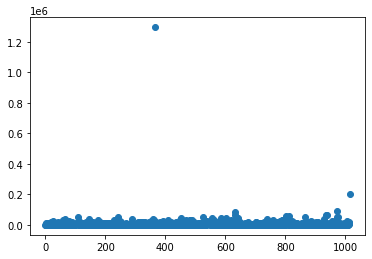

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

Eсть немного дорогих заказов. По графику можно выбрать границу аномальных заказов 80 000-90 000 рублей. Но пока мы их не трогаем. Далее мы к ним еще вернемся во время анализа и подберем наиболее подходящий вариант

## Анализ A/B-теста

Для начала проверим размеры выборок: по количеству пользователей и по количеству заказов

In [23]:
print(visitors[visitors['group']=='A']['visitors'].sum())
print(visitors[visitors['group']=='B']['visitors'].sum())

18736
18916


Разница в численности между группами A и B незначительная (~1%). Это хороший знак, потому что сильно разные группы могут внести перекос в результаты.

In [24]:
print(len(orders[orders['group']=='A']))
print(len(orders[orders['group']=='B']))

468
548


Разница в количестве заказов между группами чуть больше (~15%), но это допустимо, особенно если число пользователей близко. 

Проверим, нет ли значительного различия в среднем числе заказов на одного пользователя:

In [25]:
mean_orders_A = len(orders[orders['group'] == 'A']) / visitors[visitors['group'] == 'A']['visitors'].sum()
mean_orders_B = len(orders[orders['group'] == 'B']) / visitors[visitors['group'] == 'B']['visitors'].sum()
print(mean_orders_A, mean_orders_B)

0.02497865072587532 0.02897018397124128


По результатам проверок нет большой разницы по размерам выборок. Можно отметить, что группа В чуть более эффективно работает.

Перейдем к анализу A/B-теста

Чтобы исключить проблему подсматривания, анализируют графики метрик. 
Изучают графики кумулятивных, или накапливаемых данных. 

Построим график кумулятивной выручки по группам. 

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData

In [26]:
#Объединим обе таблицы в одну с понятными названиями столбцов: 
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Text(0, 0.5, 'Выручка')

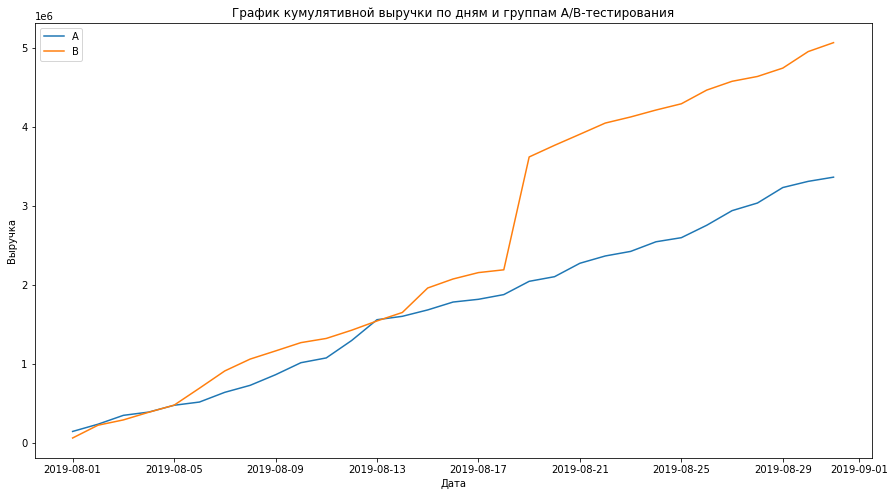

In [27]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Устанавливаем размер графика
plt.figure(figsize=(15, 8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')

На графике видно: Выручка почти равномерно увеличивается в первой половине теста. Но группа В все равно лидирует. В середине теста сегмент B вырвался вперёд, сильно увеличил показатели и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

Text(0, 0.5, 'Средний чек')

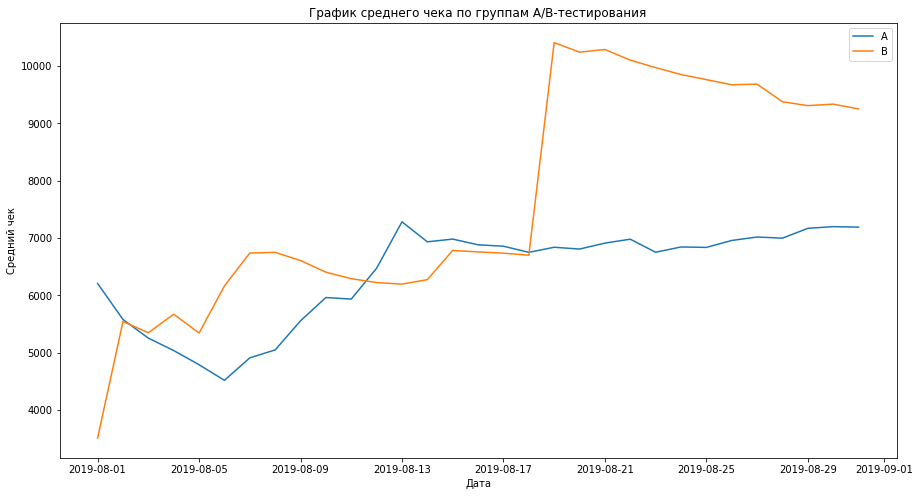

In [28]:
# Устанавливаем размер графика
plt.figure(figsize=(15, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График среднего чека по группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты. группа В нестабильна. Возможно, в группу B в середине теста теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Необходимо будет учесть этот факт при принятии решения о результатах A/B-теста

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

Text(0, 0.5, 'Комулятивный средний чек')

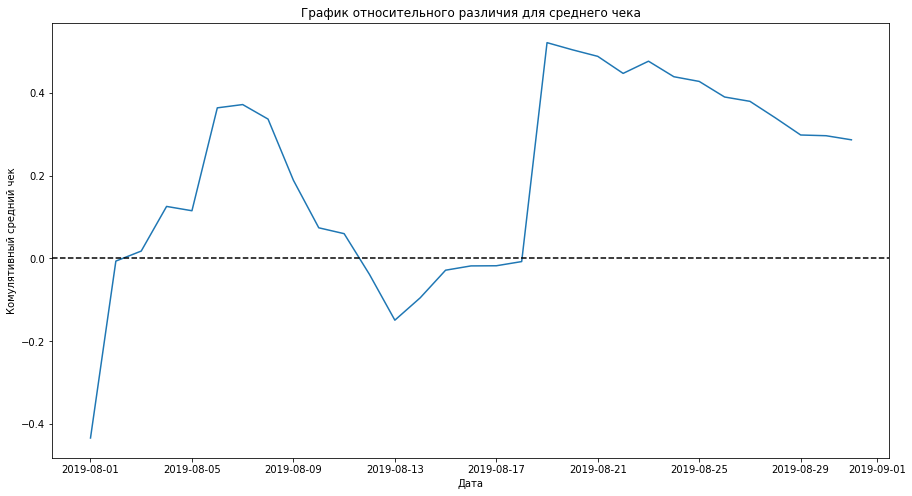

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Устанавливаем размер графика
plt.figure(figsize=(15, 8))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного различия для среднего чека')
plt.xlabel('Дата')
plt.ylabel('Комулятивный средний чек')

 Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы. Найдём их позже.

Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-09-01', 0, 0.05]:

Text(0, 0.5, 'Комулятивное среднее кол-во заказов')

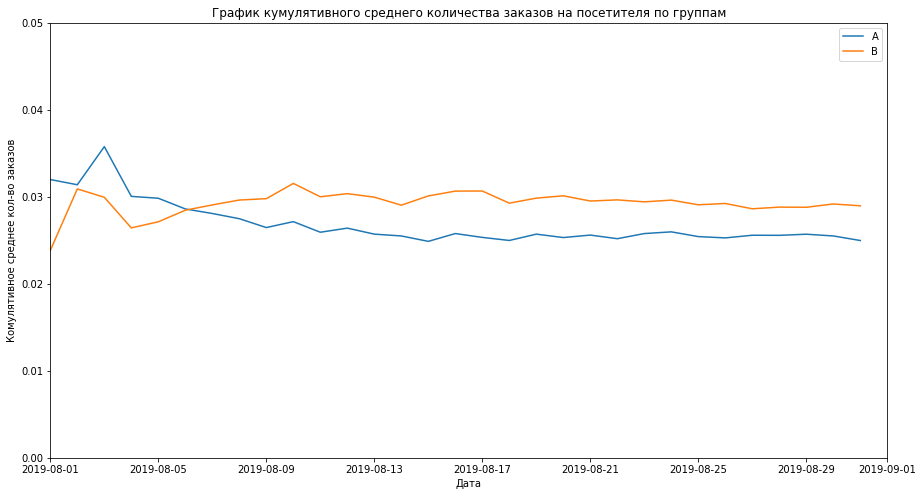

In [30]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Устанавливаем размер графика
plt.figure(figsize=(15, 8))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) 

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Комулятивное среднее кол-во заказов')

В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A. А у группы А — просело, но тоже зафиксировалось.
Мы изменили масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 2% до 4%. В относительных величинах — это почти в 2 раза. Потому, если убрать масштаб осей, будет казаться, что колебания продолжаются, и среднее количество заказов по группам не установилось около своего среднего значения.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Text(0, 0.5, 'Кумулятивного среднее кол-во заказов на посетителя')

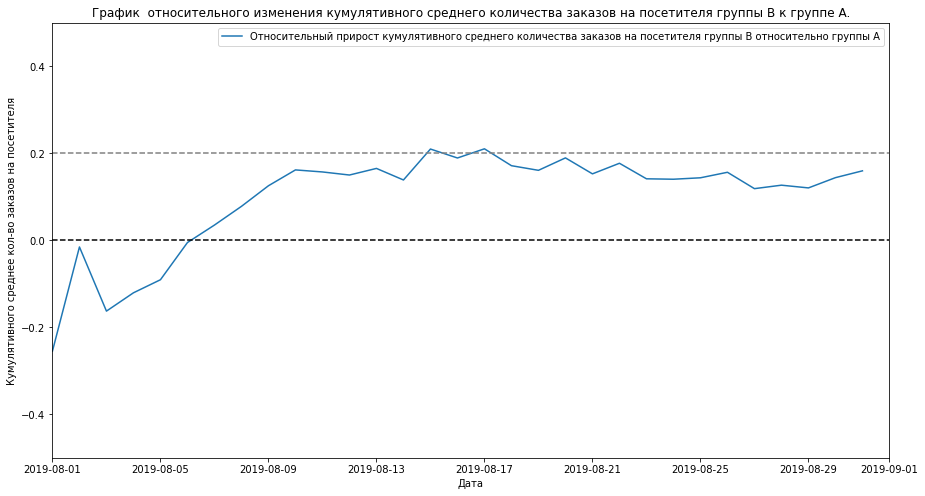

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Устанавливаем размер графика
plt.figure(figsize=(15, 8))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y= 0, color='black', linestyle='--')
plt.axhline(y= 0.2, color='grey', linestyle='--')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

plt.title('График  относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Кумулятивного среднее кол-во заказов на посетителя')

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд, зафиксировалась около прироста в 20% относительно группы A. Потом среднее количество заказов на посетителя для группы B снова уменьшалось, но теперь постепенно растёт
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

Построим точечный график количества заказов по пользователям.

In [32]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False) #сгруппирует заказы по пользователям
    .agg({'transactionId' : 'nunique',}) #подсчитает число уникальных заказов по сгруппированным данным
) 
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) #отсортирует датафрейм по значению в столбце

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Построим гистограмму распределения числа заказов по пользователям методом hist().

(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

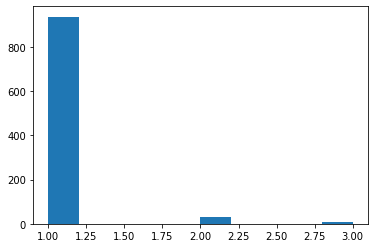

In [33]:
plt.hist(ordersByUsers['orders'])

Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2, 3 и более раза. Построим график другого вида.

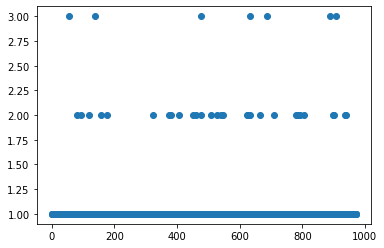

In [34]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 
2 заказа — нормально или много? Ответим на этот вопрос, посчитав выборочные перцентили.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. И выберем границу для определения аномальных пользователей.

In [35]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали больше одного заказов. И не более 1% пользователей — больше двух заказов. Граница для определения аномальных пользователей — это 2 заказа. То есть аномальный уровень заказов: больше 2 заказов, а нормальный до 2 заказов

Построим точечный график стоимостей заказов.

Text(0, 0.5, 'Стоимость заказов')

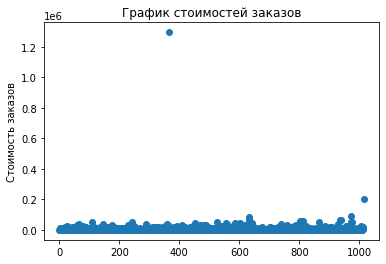

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказов')

Заказов стоимостью более 80 000 рублей не очень много. Есть выбросы в районе 200 000 — 1 250 000 рублей. Найдем выборочные перцентили. 
Заказ на 1,2 миллиона в интернет-магазине выглядит весьма аномально.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [37]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более, чем у 5% заказов чек дороже 26785 рублей. И не больше, чем у 1% заказов — дороже 53904 рублей. Разумно выбрать 30000 за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней. То есть те, у кого заказы выше 30000, будут считаться аномальными(до 30000 это нормальные)

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Нулевая гипотеза (H₀): статистически значимых различий в среднем кол-ве заказов между группами нет 

Альтернативная гипотеза (H₁): статистически значимые различия в среднем кол-ве заказов между группами есть

In [38]:
# Разделение данных о посетителях по группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Накопительное количество посетителей в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Разделение данных о посетителях по группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Накопительное количество посетителей в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Ежедневные заказы в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Накопительные заказы и доход в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Ежедневные заказы в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Накопительные заказы и доход в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Объединение данных о заказах и посетителях
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# Проверяем первые 5 строк объединенных данных
print(data.head(5))

# Подсчет количества заказов на каждого пользователя в группе A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

# Подсчет количества заказов на каждого пользователя в группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Добавляем нули пользователям, которые не совершали заказы в группе A
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Добавляем нули пользователям, которые не совершали заказы в группе B
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применяем тест Манна-Уитни для сравнения выборок
stat, p_value = stats.mannwhitneyu(sampleA, sampleB)
print(f'P-value: {round(p_value, 5)}')#P-value для выборок

# Вычисляем относительное различие в конверсии между группами A и B
conversionA = data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum()
conversionB = data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum()

relative_difference = (conversionB / conversionA) - 1
print(f'статистическая значимость: {round(relative_difference, 3)}') #Относительное различие

# Анализ аномальных пользователей (больше 3 заказов или заказов на сумму > 40000)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Фильтруем выборки, исключая аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза (H₀): 
статистически значимых различий в среднем чеке заказа между группами нет. 
Альтернативная гипотеза (H₁):статистически значимые различия в среднем чеке заказа между группами есть.

In [39]:
# Фильтрация и вычисление значимости среднего чека между группами
# Вычислим p-value с использованием теста Манна-Уитни
p_value = stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'],
    orders[orders['group'] == 'B']['revenue']
)[1]

# Округлим p-value до трех знаков после запятой
print(f'p_value : {round(p_value, 3)}')

# Рассчитаем и выведем относительный прирост среднего чека группы B по сравнению с группой A
mean_revenue_A = orders[orders['group'] == 'A']['revenue'].mean()
mean_revenue_B = orders[orders['group'] == 'B']['revenue'].mean()

relative_increase = (mean_revenue_B / mean_revenue_A) - 1
print(f'Относительный прирост среднего чека группы B : {round(relative_increase, 3)}') #Относительный прирост среднего чека группы B 

p_value : 0.829
Относительный прирост среднего чека группы B : 0.287


P-value больше 0.05 — нет оснований отвергнуть нулевую гипотезу, статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 28.7%
Приступим к анализу аномалий.

Напомним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя. 

Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.
Удалять нужно именно пользователей — сначала определить аномальные заказы. Затем пользователей, совершивших их, и добавить их в список аномальных. 

In [40]:
# Определение аномальных пользователей
# Срез пользователей, совершивших больше 2 заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitorId, dtype: int64


Теперь у нас есть множество аномальных пользователей. После их удаления будет пора считать статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Выведем p-value для сравнения среднего между очищенными группами. Округлим p-value до пяти знаков после запятой. Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#применим статистический критерий Манна-Уитни к полученным выборкам:
print('p-value:''{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост среднего очищенной группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:0.00971
относительный прирост среднего очищенной группы B: 0.187


Как и в случае с сырыми данными, p-value < 0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную. Это значит, что статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Выведем p-value для сравнения средних чеков между очищенными группами. Округлим p-value до трёх знаков после запятой. Выведем относительный прирост среднего чека очищенной группы B, округлив до трёх знаков после запятой.

In [42]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека очищенной группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.741
Относительный прирост среднего чека очищенной группы B: -0.027


P-value уменьшился, но все еще больше 0.05, нет оснований отвергнуть нулевую гипотезу. Статистически значимых различий между группами не обнаружено и разница между сегментами сократилась с 28% до 2%.

Примем решение по результатам теста:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Сегмент B значительно лучше сегмента A.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Аналогичный результат и после фльтрации. Но разница между сегментами сократилась с 28% до 2%.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.
- Исходя из фактов выше, следует остановить тест, зафиксировать победу одной из групп(Группа В).